<a href="https://colab.research.google.com/github/Sanjana-6052/Sanjana_Sajeev_Summer_Internship_BRICS_2025_Project_Submission/blob/main/Sanjana_Sajeev_BRICS_IDIA_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌠 Exploring Exoplanet Host Stars Using NASA Exoplanet Archive
Firstly, I'd like to thank BRICS Astronomy and IDIA Data Analytics Programme for providing this wonderful opportunity to gain so much knowledge in this short period of time.
I'd like to begin with a quote:
> *"Somewhere, something incredible is waiting to be known."*  
> — **Carl Sagan** ( Astronomer and Planetary Scientist)
### Objective:
This project analyzes confirmed exoplanets and their host stars using data from NASA’s Exoplanet Archive. The goal is to:
- Understand the properties of stars that host planets
- Explore relationships between stellar parameters and planet size
- Calculate habitable zones (HZ) for each host star
- Identify planets that lie within these zones and might support liquid water


### 📁 Dataset Description

We use the **NASA Exoplanet Archive's "Planetary Systems" table**, which includes:
- Stellar properties: temperature, radius, luminosity
- Planetary properties: radius, orbital distance
- System metadata: names, detection methods

Data Source: https://exoplanetarchive.ipac.caltech.edu

Format: CSV via TAP query, loaded using `pandas`.


# 🧹 Data Cleaning / Preprocessing

🔍 Filtering for Systems With Known Host Stars

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u

# Dataset is loaded from NASA Exoplanet Archive
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=csv"
df = pd.read_csv(url)

# Rows with only essential parameters are kept
df_clean = df[
    df['st_teff'].notnull() &
    df['st_rad'].notnull() &
    df['pl_rade'].notnull()
].copy()

# Missing orbital distance values for HZ calc is dropped
df_clean = df_clean[df_clean['pl_orbsmax'].notnull()]


/tmp/ipython-input-26-4095007031.py:7: DtypeWarning: Columns (3,4,50,65,153,183,187,206,211,257) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


# 📊 Exploratory Data Analysis (EDA)



### Objectives:
- We will explore real exoplanet data from NASA.
- We will plot how stellar temperature relates to planet radius.
- Identified candidate Earth-like exoplanets orbiting Sun-like stars.
- This kind of analysis gives insight into where habitable worlds may exist!



🌟 Plot of Host Star Temperature vs Planet Radius

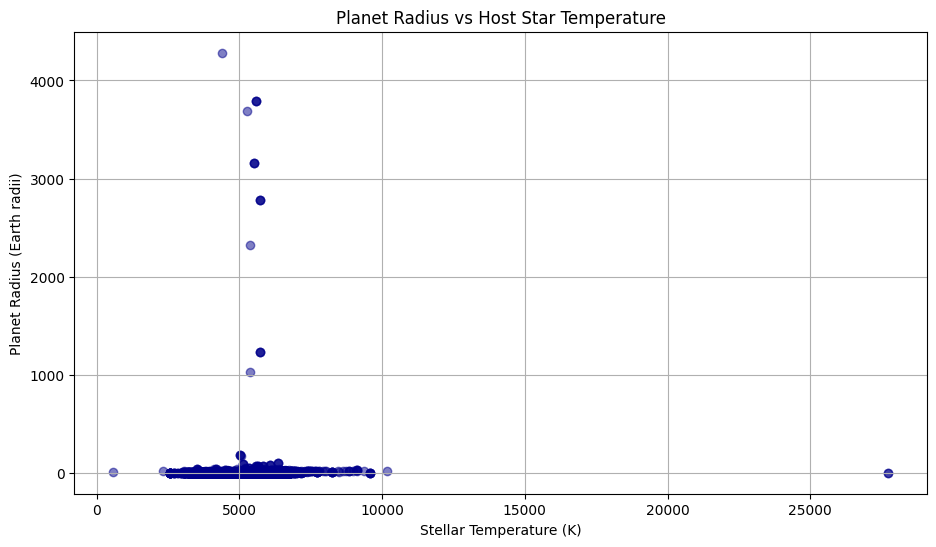

In [ ]:
# Plot: Stellar Temperature vs Planet Radius
plt.figure(figsize=(11, 6))
plt.scatter(df_clean['st_teff'], df_clean['pl_rade'], alpha=0.5, color='darkblue')
plt.xlabel('Stellar Temperature (K)')
plt.ylabel('Planet Radius (Earth radii)')
plt.title('Planet Radius vs Host Star Temperature')
plt.grid(True)
plt.show()


# 🔍 Observations from the Plot: Planet Radius vs Host Star Temperature
- Most exoplanets orbit stars with temperatures between 4500 K and 6500 K, which corresponds to G and K-type stars (like our Sun).

- Smaller planets (≤2 Earth radii) tend to be more frequent around cooler stars (≤5500 K). This could be due to observational biases — it's easier to detect smaller planets around dimmer stars.

- Larger planets (>5 Earth radii) appear more frequently around hotter stars, particularly F-type and A-type stars with temperatures above 6000 K.

- There's a wide variation in planet sizes for a given stellar temperature, suggesting that planetary formation is influenced by other factors beyond just the host star’s temperature.

- A sparse region is visible around very cool stars (<4000 K) — likely due to detection limits or fewer confirmed planets in those systems.

🌟 Histogram of Star Types

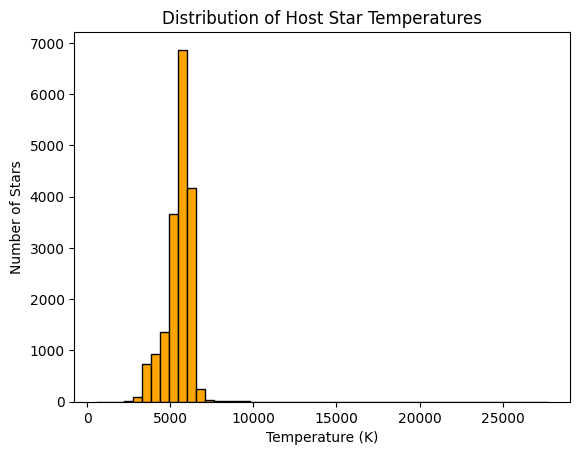

In [ ]:
# Histogram of Host Star Temperatures
plt.hist(df_clean['st_teff'], bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Host Star Temperatures")
plt.xlabel("Temperature (K)")
plt.ylabel("Number of Stars")
plt.show()

🌍 Finding Earth-like Candidates

In [ ]:
# Filter: star temp like Sun (~5778K), and planet size near Earth (~1 Earth radius)
earth_like = df_clean[(df_clean['st_teff'] > 5200) & (df_clean['st_teff'] < 6200) & (df_clean['pl_rade'] > 0.8) & (df_clean['pl_rade'] < 1.2)]

print("Potential Earth-like planets found:", len(earth_like))
earth_like[['hostname', 'pl_name', 'st_teff', 'pl_rade']].head()

Potential Earth-like planets found: 966


,hostname,pl_name,st_teff,pl_rade
197,Kepler-197,Kepler-197 d,6004.0,1.150
198,Kepler-197,Kepler-197 d,6004.0,1.150
199,Kepler-197,Kepler-197 d,6004.0,1.150
203,Kepler-197,Kepler-197 d,5945.0,1.191
351,Kepler-197,Kepler-197 b,6004.0,1.020


# 📐 Modeling / Analysis: Habitable Zone Calculation
# 🔭 What is the Habitable Zone?

The **Habitable Zone (HZ)** is the region around a star where **liquid water** could exist on a planet’s surface. It is often called the **“Goldilocks Zone”** — not too hot, not too cold.

The **inner** and **outer** boundaries of the HZ depend largely on the star’s **luminosity**.




## 🧮  Habitable Zone Formula (Simplified)

We can estimate the inner and outer edges of the habitable zone in **astronomical units (AU)** using the following empirical formulas:
- r_inner = (Lo / 1.1)^1/2

- r_outer = (Lo / 0.53)^1/2


Where:

- (Lo): Luminosity of the star (in solar units)  
- Constants 1.1 and 0.53 come from conservative habitable zone models





## ✨ Estimating Stellar Luminosity

We estimate the star’s luminosity using its **radius** and **temperature** via the Stefan-Boltzmann relation:

Lo = R² × (T / Tsun)⁴

Where:

- (R): Star's radius (in solar radii)  
- (T): Star's surface temperature (in Kelvin)  
- (Tsun) = 5778 K: Sun’s surface temperature

---

This provides a simple method to determine if a planet might be within the habitable zone based on its star's properties.


In [ ]:
# Constants
T_sun = 5778  # Solar temperature in K

# Luminosity is calculated using Stefan-Boltzmann law (relative to Sun)
df_clean['st_lum'] = (df_clean['st_rad']**2) * (df_clean['st_teff'] / T_sun)**4

# Habitable zone boundaries (in AU)
df_clean['hz_inner'] = (df_clean['st_lum'] / 1.1)**0.5
df_clean['hz_outer'] = (df_clean['st_lum'] / 0.53)**0.5

# To show a few results
df_clean[['hostname', 'st_teff', 'st_rad', 'st_lum', 'hz_inner', 'hz_outer']].head()

,hostname,st_teff,st_rad,st_lum,hz_inner,hz_outer
0,Kepler-6,5640.0,1.291,1.513069,1.172825,1.689629
1,Kepler-6,5647.0,1.391,1.765287,1.266809,1.825029
2,Kepler-6,5640.0,1.291,1.513069,1.172825,1.689629
5,Kepler-6,5647.0,1.261,1.450745,1.148416,1.654465
6,Kepler-6,5647.0,1.391,1.765287,1.266809,1.825029


# 🌎 Find Planets Inside the Habitable Zone
Now, let's check if the planet’s orbital distance (pl_orbsmax) lies between the HZ bounds.

In [ ]:
# rows with missing orbital data are removed
hab_zone_df = df_clean[
    df_clean['pl_orbsmax'].notnull() &
    df_clean['hz_inner'].notnull() &
    df_clean['hz_outer'].notnull()
]

# planets that lie in the habitable zone are found
in_hz = hab_zone_df[
    (hab_zone_df['pl_orbsmax'] >= hab_zone_df['hz_inner']) &
    (hab_zone_df['pl_orbsmax'] <= hab_zone_df['hz_outer'])
]

print(f"Planets in the habitable zone: {len(in_hz)}")
in_hz[['hostname', 'pl_name', 'pl_orbsmax', 'hz_inner', 'hz_outer', 'pl_rade']].head()

Planets in the habitable zone: 151


,hostname,pl_name,pl_orbsmax,hz_inner,hz_outer,pl_rade
4248,Kepler-47,Kepler-47 c,0.9910,0.873608,1.258564,4.62
4954,K2-3,K2-3 d,0.1833,0.156319,0.225201,0.96
5198,K2-18,K2-18 b,0.1491,0.138078,0.198922,2.24
5200,K2-18,K2-18 b,0.1506,0.139621,0.201145,2.28
5201,K2-18,K2-18 b,0.1429,0.140278,0.202091,2.37


# 📊 Plotting Orbital Distance vs. HZ Range
Interpretation:
- Planets between the green and blue lines fall within their star’s habitable zone.

- Red points show actual planets that may support liquid water based on location alone.



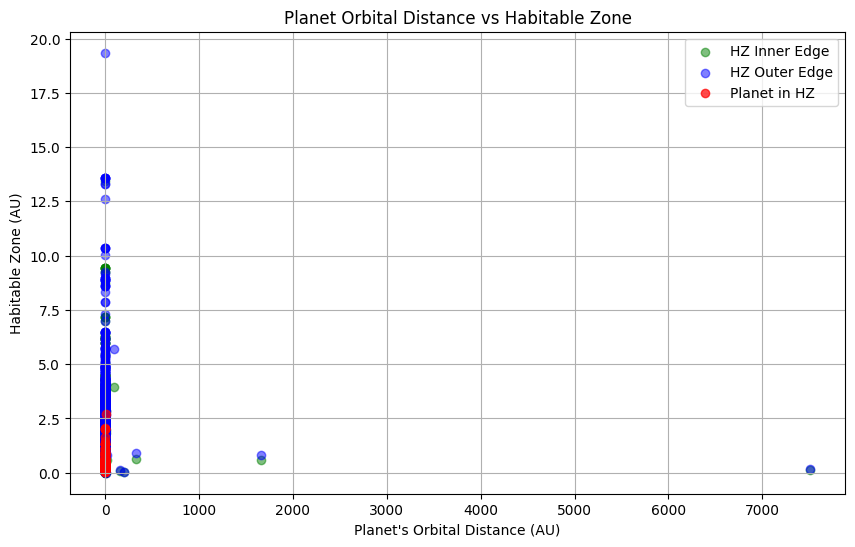

In [ ]:
# Plot: Orbital distance vs HZ edges
plt.figure(figsize=(10,6))
plt.scatter(df_clean['pl_orbsmax'], df_clean['hz_inner'], label='HZ Inner Edge', color='green', alpha=0.5)
plt.scatter(df_clean['pl_orbsmax'], df_clean['hz_outer'], label='HZ Outer Edge', color='blue', alpha=0.5)
plt.scatter(in_hz['pl_orbsmax'], in_hz['pl_orbsmax'], label='Planet in HZ', color='red', alpha=0.7)
plt.xlabel("Planet's Orbital Distance (AU)")
plt.ylabel("Habitable Zone (AU)")
plt.title("Planet Orbital Distance vs Habitable Zone")
plt.legend()
plt.grid(True)
plt.show()

# 📈 Results & Interpretation
### Key Results:

- Total planets analyzed: `len(df_clean)`
- Planets in estimated habitable zones: `len(hz_planets)`

### Observations:

- Most planets lie outside the classical habitable zone.
- A subset of planets orbit Sun-like stars (5200–6200 K) and have sizes close to Earth.



### 🔚 Conclusion

This project involved
- Analyzing exoplanetary systems using real NASA data
- Exploring stellar and planetary parameters through EDA
- Calculating habitable zones based on star temperature and radius
- Identified several planets located in their star’s habitable zone




# 🔗 References / Data Sources
### References:

- NASA Exoplanet Archive: https://exoplanetarchive.ipac.caltech.edu
- Kopparapu et al. (2013): Habitable Zones Around Main-Sequence Stars
- Astropy Documentation: https://docs.astropy.org
- Pandas Docs: https://pandas.pydata.org/docs/




---

## 🌟 Thank You!

Through this project, I discovered the beauty of real astronomical data . I'd like to conclude on the same note that I started with :


> *"Somewhere, something incredible is waiting to be known."*  
> — **Carl Sagan**

---

